## Linear Regression


Yₑ = α + β X

where, Yₑ is the estimated or predicted value of Y based on our linear equation.
Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ.
If we are able to determine the optimum values of α and β, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.

Ordinary Least Squares: find values of α and β that minimise the sum of the squared difference between Y and Yₑ.
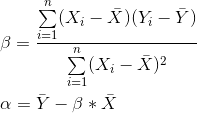

### Gradient Descent

Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.
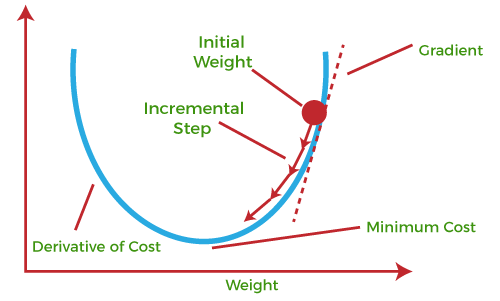
The steps of the algorithm are:<br>
Find the slope of the objective function with respect to each parameter/feature,or compute the gradient of the function.<br>
Pick a random initial value for the parameters. (To clarify, in the parabola example, differentiate “y” with respect to “x”. If we had more features like x1, x2 etc., we take the partial derivative of “y” with respect to each of the features.)<br>
Update the gradient function by plugging in the parameter values.<br>
Calculate the step sizes for each feature as : step size = gradient * learning rate.<br>
Calculate the new parameters as : new params = old params - step size<br>
Repeat steps 3 to 5 until gradient is almost 0.

The “learning rate” mentioned above is a flexible parameter which heavily influences the convergence of the algorithm. Larger learning rates make the algorithm take huge steps down the slope and it might jump across the minimum point thereby missing it. So, it is always good to stick to low learning rate such as 0.01. It can also be mathematically shown that gradient descent algorithm takes larger steps down the slope if the starting point is high above and takes baby steps as it reaches closer to the destination to be careful not to miss it and also be quick enough.

Downsides of the gradient descent algorithm: Say we have 10,000 data points and 10 features. The sum of squared residuals consists of as many terms as there are data points, so 10000 terms in our case. We need to compute the derivative of this function with respect to each of the features, so in effect we will be doing 10000 * 10 = 100,000 computations per iteration. It is common to take 1000 iterations, in effect we have 100,000 * 1000 = 100000000 computations to complete the algorithm. That is pretty much an overhead and hence gradient descent is slow on huge data.<br>
Stochastic gradient descent randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.<br>
Mini-batch tries to strike a balance between the goodness of gradient descent and speed of SGD. It samples a small number of data points instead of just one point at each step.

To summarize, let assume that we have a train set with m rows. The batch size, n, used to train and update model parameters for:<br>
batch gradient descent: n = m <br>
mini-batch gradient descent: 1 < n < m<br>
stochastic gradient descent: n = 1


alpha = 2.0031670124623426
beta = 0.3229396867092763


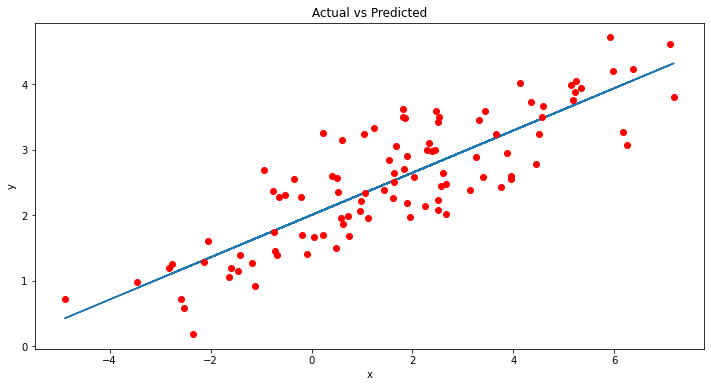

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate 'random' data
np.random.seed(0)
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': x,
     'y': y}
)

# Calculate the mean of X and y
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

ypred = alpha + beta * x
# print(f'Predicted Value = {ypred}')

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, ypred)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Housing Prices Dataset: The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. 

In [9]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    print(df.head())
    data = np.array(df, dtype=float)
    plot_data(data[:,:2], data[:, -1])
    normalize(data)
    return data[:,:2], data[:, -1]

note: 

x is made up of the first 2 columns of the dataset whereas y is the last column of the dataset as that is the price column hence in order to return x and y we are returning data[:,:2] and data[:,-1] respectively from the function.

feature normalization: values in the second column (i.e. the number of rooms) are much smaller than the those in the first (i.e house size). For the model its all just numbers. This can create an unwanted bias in your machine learning model towards the columns (or features) that have higher numerical values than the others. It can also create imbalance in the variance and mathematical mean. For these reasons and also to make the job easier it is always advised to scale or normalize your features so that they all lie within the same range ( e.g. [-1 to 1] or [0 to 1] ).

In [10]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:,0], y, 'bo')
    plt.show()
        

    

You can see that it is possible to roughly fit a line through the above plot. This means a linear approximation will actually allow us to make pretty accurate predictions and hence we go for linear regression.

hθ(x) = θ0 + θ1x1 + θ2x2

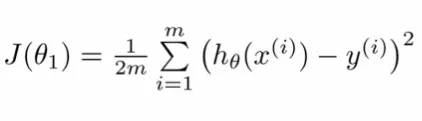

Loss function is to capture the difference between the actual and predicted values for a single record whereas cost functions aggregate the difference for the entire training dataset.

Gradient descent is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function.
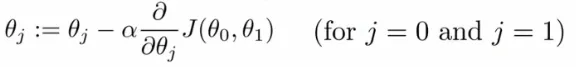

In [11]:
def h(x,theta):
    return np.matmul(x, theta)

def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

The gradient_descent function returns theta and J_all. theta is obviously our parameter vector which contains the values of θs for the hypothesis and J_all is a list containing the cost function after each epoch. The J_all variable isn’t exactly essential but it helps to analyze the model better

In [ ]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

In [13]:
def test(theta, x):
    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    print("Price of house: ", y)

   housesize  rooms   price
0       1600      3  329900
1       2400      3  369000
2       1416      2  232000
3       3000      4  539900
4       1985      4  299900


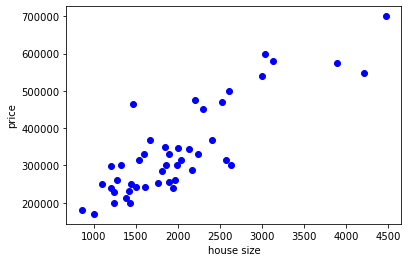

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


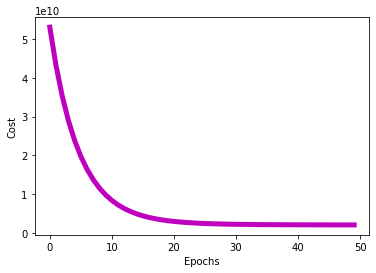

Price of house:  [1.66842816e+08]


In [14]:
#variables to store mean and standard deviation for each feature
mu = []
std = []

x,y = load_data("house_price_data.txt")
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 3])

To minimize the mean square error of a system of linear equations
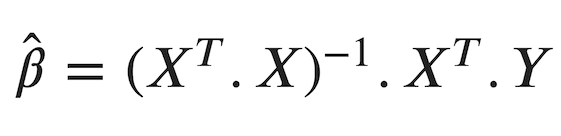

Reference: https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5

In [15]:
beta_hat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(beta_hat)
# predict using coefficients
yhat = x.dot(beta_hat)
#for testing
new_x = [1600, 3]
new_y = beta_hat[0] + beta_hat[1]*new_x[0] + beta_hat[2]*new_x[1]
new_y

[[339119.45652174]
 [110248.92165868]
 [ -6226.22670553]]


array([1.76718715e+08])

In [16]:
from sklearn.linear_model import LinearRegression

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x, y)
model.coef_ = model.coef_[:,1:]
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

# model.predict(x)
new_X = [[1600, 3]]
print(model.predict(new_X))

alpha = [339119.45652174]
betas = [[110248.92165868  -6226.22670553]]
[[1.76718715e+08]]


In [17]:
# Alternate way
model = lm.fit(x, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

# model.predict(x)
new_X = [[1, 1600, 3]]
print(model.predict(new_X))

alpha = [339119.45652174]
betas = [[     0.         110248.92165868  -6226.22670553]]
[[1.76718715e+08]]
